## Accessing Databases with Python

-  This is a frame for how to create a database, load data from a CSV file as a table, and then run queries on the data.




first steps are:

- Create a database

- Load the data from a CSV file as a table to the database

- Run sql queries on the database and access data



In [63]:
#lib
import sqlite3
import pandas as pd
conn = sqlite3.connect('STAFF.db')
# we connect to a db here

   - creating a table to upload to the DB

In [64]:
# Define table parameters
table_name = 'INSTRUCTOR'
attribute_list = ['ID', 'FNAME', 'LNAME', 'CITY', 'CCODE']

Now, to read the CSV using Pandas, you use the read_csv() function. Since this CSV does not contain headers, you can use the keys of the attribute_dict dictionary as a list to assign headers to the data. For this, add the commands below to db_code.py.

In [65]:
# Read the CSV data
file_path = 'DB Project/INSTRUCTOR.csv'
df = pd.read_csv(file_path, names = attribute_list)

   - Loading the data to the database


The pandas library provides easy loading of its dataframes directly to the database. For this, you may use the to_sql() method of the dataframe object.

However, while you load the data for creating the table, you need to be careful if a table with the same name already exists in the database. If so, and it isn't required anymore, the tables should be replaced with the one you are loading here. You may also need to append some information to an existing table. For this purpose, to_sql() function uses the argument if_exists. The possible usage of if_exists is tabulated below.

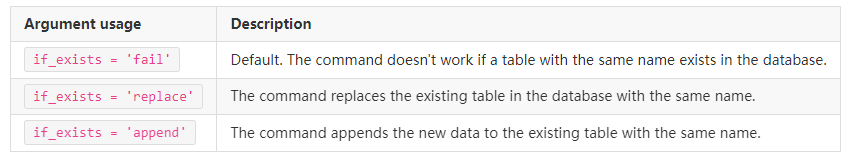

In [66]:
# Load the CSV to the database
df.to_sql(table_name, conn, if_exists = 'replace', index =False)
print('Table is ready')

Table is ready


----------------------------
### Running basic queries on data

In [67]:
query_statement = f"SELECT * FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

SELECT * FROM INSTRUCTOR
    ID    FNAME      LNAME      CITY CCODE
0    1      Rav      Ahuja   TORONTO    CA
1    2     Raul      Chong   Markham    CA
2    3     Hima  Vasudevan   Chicago    US
3    4     John     Thomas  Illinois    US
4    5    Alice      James  Illinois    US
5    6    Steve      Wells  Illinois    US
6    7  Santosh      Kumar  Illinois    US
7    8    Ahmed    Hussain  Illinois    US
8    9    Nancy      Allen  Illinois    US
9   10     Mary     Thomas  Illinois    US
10  11  Bharath      Gupta  Illinois    US
11  12   Andrea      Jones  Illinois    US
12  13      Ann      Jacob  Illinois    US
13  14     Amit      Kumar  NewDelhi    IN


In [68]:
query_statement = f"SELECT FNAME FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

SELECT FNAME FROM INSTRUCTOR
      FNAME
0       Rav
1      Raul
2      Hima
3      John
4     Alice
5     Steve
6   Santosh
7     Ahmed
8     Nancy
9      Mary
10  Bharath
11   Andrea
12      Ann
13     Amit


In [69]:
query_statement = f"SELECT COUNT(*) FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

SELECT COUNT(*) FROM INSTRUCTOR
   COUNT(*)
0        14


-------------------------
this is how we can append data to tables, manually.

In [83]:
data_dict = {'ID' : [100],
            'FNAME' : ['John'],
            'LNAME' : ['Doe'],
            'CITY' : ['Paris'],
            'CCODE' : ['FR']}
data_append = pd.DataFrame(data_dict)

In [84]:
data_append.to_sql(table_name, conn, if_exists = 'append', index =False)
print('Data appended')

Data appended


In [85]:
query_statement = f"SELECT COUNT(*) FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

SELECT COUNT(*) FROM INSTRUCTOR
   COUNT(*)
0        15


In [86]:
query_statement = f"DELETE FROM INSTRUCTOR WHERE CITY = 'Paris' AND CCODE = 'FR'"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

TypeError: 'NoneType' object is not iterable

-------------------------------

In [87]:
uery_statement = f"SELECT * FROM {table_name}"
query_output = pd.read_sql(query_statement, conn)
print(query_statement)
print(query_output)

TypeError: 'NoneType' object is not iterable